# **Applied Statistics Assessment Notebook - Problems**

## Import Libraries
___

In [98]:
# Libraries

import math # mathmatical functions
import itertools # permutations and combinations
import random # random selections
import numpy as np # numerical structures and operations
import matplotlib.pyplot as plt # plotting
from tabulate import tabulate # table formatting
import scipy.stats as stats # Statistical models.
import statsmodels as sm # Statistics.

## **Problem 1: Extending the Lady Tasting Tea**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Nice_Cup_of_Tea.jpg/960px-Nice_Cup_of_Tea.jpg" alt="Tea Set" style="width: 600px; height: 400px;">

<small>By Vanderdecken - Author's original own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=1613904<small>

---
### **Answering the Problem**
___

In order to answer this problem, there are three things we need to address:

1. The estimated probability of the original 8-cup experiment
2. The estimated probability of the new 12-cup experiment
3. How the two compare with one another

---
#### 1. Running the Original Experiment
---

Let's start off by re-running the original experiment and determining it's probability. First we need to flag the number of cups involved in the experiment.

In [99]:
# Total number of cups
no_cups  = 8

# Number of cups with tea-first
cups_tea = 4

# Number of cups with tea-first
cups_milk = 4


Next we need label the various types of cups, so that we can determine the overall number of ways four cups (at this stage any four cups) could be selected out of that total.

In [100]:
# Label the cups
labels = list(range(no_cups))

# Show the different ways of selecting cups_milk out of no_cups
combs = list(itertools.combinations(labels, cups_milk))
print("The maximum number of cup combinations is",len(combs))

The maximum number of cup combinations is 70


Now we want to label four specic cups as the cups which had milk put in them first.

In [101]:
# Select four cups at random to put milk in and then sort those labels so that they mirror the iterated data in combs
labels_milk = random.sample(labels, 4)
labels_milk.sort()
set(labels_milk)

{0, 1, 4, 6}

With the milk cups labelled, we can now start to look at how often these cups will be selected at random. To do this, we look at every single combination of cup selections and identify which of those include cups labelled as milk first cups and how many milk first cups they include. 

In [102]:
# Create a list to store the overlap between each element of combs and labels_milk.
no_overlaps = []

# loop through combinations
for comb in combs:
    s1 = set(comb)
    s2 = set(labels_milk)
    # Figure out where they overlap
    overlap = s1.intersection(s2)
    #Append overlap to no_overlaps
    no_overlaps.append(len(overlap))

# Count the number of times each overlap occurs.
counts= np.unique(no_overlaps, return_counts=True)

We can now chart the results of the above analysis to see the breakdown of the the amount of milk first cups in each possible combination of cups (e.g. of the 70 possible cup combinations, how many of these combinations include 0,1,2,3 or 4 milk first cups?).

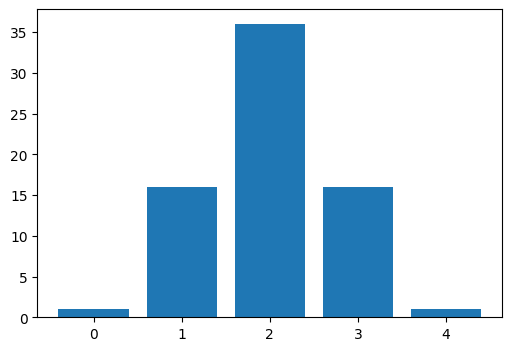

In [103]:
# Chart for the orginal experiment
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(counts[0],counts[1]);

In [104]:
# Prepare data for tabulation
data = list(zip(*counts))
headers = ["Overlap Count", "Frequency"]
print(tabulate(data, headers=headers,tablefmt="grid")) 

+-----------------+-------------+
|   Overlap Count |   Frequency |
+=================+=============+
|               0 |           1 |
+-----------------+-------------+
|               1 |          16 |
+-----------------+-------------+
|               2 |          36 |
+-----------------+-------------+
|               3 |          16 |
+-----------------+-------------+
|               4 |           1 |
+-----------------+-------------+


Finally, lets work out the probability for how likely it is, given the number of combinations, that the participant will randomly select all the correct milk first cups and, also, how likely it is that they will select more than half milk first cups.

In [105]:
# Number of times where the participant selects all the correct cups_milk
overlap_4 = dict(data).get(4, 0)
overlap_3 = dict(data).get(3, 0)
overlap_2 = dict(data).get(2, 0)

# Calculate the likeilhood of this happening
likelihood = overlap_4 / len(combs)
likelihood50 = (overlap_4 + overlap_3 +overlap_2) / len(combs)

print(f"The probability of the participant correctly identifying all cups by chance is {likelihood*100:.2f}%")
print(f"The probability of the participant selecting two or more cups by chance is {likelihood50*100:.2f}%")

The probability of the participant correctly identifying all cups by chance is 1.43%
The probability of the participant selecting two or more cups by chance is 75.71%


So, we can see that it is highly unlikely that the participant will select all four milk first cups correctly at random but there is a very good chance that they will select more than two correct cups, even if selecting at random.

---
### 2. Running the New 12-cup Experiment
---

So, for the next part we are going to re-run everything we have done above. However, this time we will be changing the total number of cups to 12 and the number of tea first cups to 8 (the number of milk first cups will remain the same).

In [106]:
no_cups  = 12
cups_tea = 8
cups_milk = 4

In [107]:
labels = list(range(no_cups))
combs = list(itertools.combinations(labels, cups_milk))
print("The maximum number of cup combinations is",len(combs))

The maximum number of cup combinations is 495


In [108]:
labels_milk = random.sample(labels, 4)
labels_milk.sort()
set(labels_milk)

{1, 2, 3, 9}

In [109]:
no_overlaps = []

for comb in combs:
    s1 = set(comb)
    s2 = set(labels_milk)
    overlap = s1.intersection(s2)
    no_overlaps.append(len(overlap))

counts= np.unique(no_overlaps, return_counts=True)

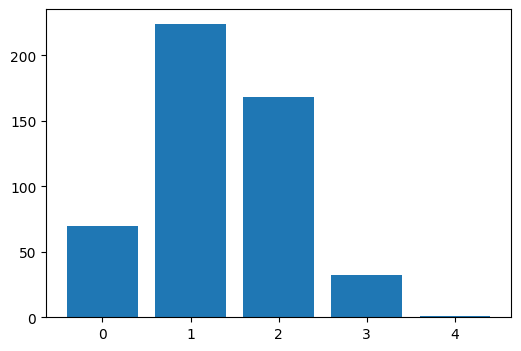

In [110]:
# Chart for the updated experiment
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(counts[0],counts[1]);

In [111]:
data = list(zip(*counts))
headers = ["Overlap Count", "Frequency"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+-----------------+-------------+
|   Overlap Count |   Frequency |
+=================+=============+
|               0 |          70 |
+-----------------+-------------+
|               1 |         224 |
+-----------------+-------------+
|               2 |         168 |
+-----------------+-------------+
|               3 |          32 |
+-----------------+-------------+
|               4 |           1 |
+-----------------+-------------+


In [112]:
# Number of times where the participant selects all the correct cups_milk
overlap_4 = dict(data).get(4, 0)
overlap_3 = dict(data).get(3, 0)
overlap_2 = dict(data).get(2, 0)

# Calculate the likeilhood of this happening
likelihood = overlap_4 / len(combs)
likelihood50 = (overlap_4 + overlap_3 +overlap_2) / len(combs)

print(f"The probability of the participant correctly identifying all cups by chance is {likelihood*100:.2f}%")
print(f"The probability of the participant selecting two or more cups by chance is {likelihood50*100:.2f}%")

The probability of the participant correctly identifying all cups by chance is 0.20%
The probability of the participant selecting two or more cups by chance is 40.61%


So, having rerun the experiement with a greater number of overall cups but the same amount of milk first cups, we can see a notable drop in the probability of the particpant both identifying all the milk first cups by chance but also a substantive drop in the likelihood of the probability of the participant selecting two or more cups by chance.

---
### 3. Comparing the Two Experiments
---

The results from both experiments demonstrate a significant drop in the likelihood the participant will pick out a statistically significant number of cups correctly at random. This is especialy true both when it comes to identifying all the cups correctly (e.g 1.43% vs 0.20%) but it is also when it comes to selecting two or more milk first cups (e.g. 75.71% vs 40.61%). As the number of tea first cups increase while the number of milk first cups remain the same, it is increasingly difficult for the participant to pick out the relevant cucps at random.

This is a trend that we would expect to continue the more non-milk first cups we add to the total. Consequently, the more tea first cups added, the more statistically significant it will be if a participant manages to correctly identify all four milk first cups correctly. This has notable implications for the p-value. It represents the probability of obtaining results as extreme as, or more extreme than, the observed results under the assumption that the null hypothesis is true. Consequently, as the likelihood of success decreases dramatically, the argument for a relaxed p-value to reflect this change in circumstances increases. 

---
### **Conclusion**
---

The p-value used for the 12-cup experiment should be relaxed compared to the one used for the 8-cup experiment.

## **Problem 2: Normal Distribution**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Planche_de_Galton.jpg/1280px-Planche_de_Galton.jpg" alt="Tea Set" style="width: 600px; height: 400px;">

<small>By Antoine Taveneaux - Author's original own work (Original text: self-made, Mathematica, Inkscape), Public Domain, https://commons.wikimedia.org/w/index.php?curid=1613904<small>

___
### **Description of the problem**
___
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

---
### **Answering the Problem**
___

The problem here is relatively straigh forward. First we need to establish the parameters and generate a random sample based off them. Then we can compute the standard deviation with ddof = 1 and ddof = 2. Plotting the results of those two variances on the same histogram should then give us an idea of how altering the bias resulting from the N value impacts the results. From there it should be possible to infer what might happen to the results if the sample size is increased.

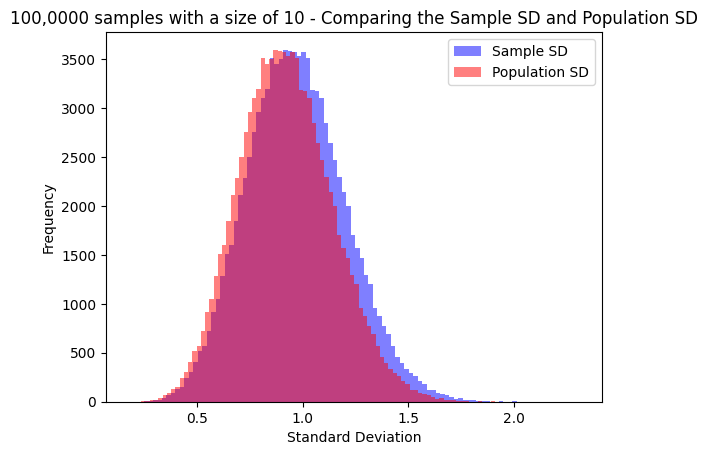

In [113]:
# Establish the parameters
samples = 100000 # Number of samples
samplesize = 10 # Size of sample

#Generate the sample data from the standard normal deviation
data = np.random.normal(0,1, (samples,samplesize)) # mean (0), standard deviation (1)

# Establish the number of data points which the standard deviation is being divided by
sample_sd = np.std(data, ddof=1, axis=1) # ddof 1 (divide by (N))
population_sd = np.std(data, ddof=0, axis=1) # ddof 0 (divide by (N-1))

# Plot histogram
plt.hist(sample_sd, bins=100, alpha=0.5, label = "Sample SD", color = "blue")
plt.hist(population_sd, bins=100, alpha=0.5, label = "Population SD", color = "red")
plt.xlabel ("Standard Deviation")
plt.ylabel("Frequency")
plt.title("100,0000 samples with a size of 10 - Comparing the Sample SD and Population SD")
plt.legend()


# END